In [1]:
# Firebase SDK setup via command line

# npm install -g firebase-tools
# firebase login
# firebase projects:list
# firebase use --project rimcat-360620
# firebase init

In [2]:
# Install packages if needed
!pip install firebase-admin pandas ydata-profiling

In [4]:
import firebase_admin
from firebase_admin import credentials, firestore, firestore_async, app_check
import os
import json
from ydata_profiling import ProfileReport
import pandas as pd

# Initialize the Firebase app
app = firebase_admin.initialize_app(options={
    'projectId': 'rimcat-360620'  # Replace with your actual project ID
})

In [5]:
# Get the Firestore client
db = firestore.client(app=app)
# db = firestore_async.client(app=app)

In [6]:
export_folder = 'collections_groups_profile'
#profile_folder = 'profiles_groups_profile'
# Retrieve and Export Documents as JSON Files --- 1717012640127
collection_path = '/rimcat/base'
# => doc_refs = db.collection('rimcat').document('base').collection('2.0.0').document('20240528').collection('scores').list_documents()

In [7]:
# Initialize a list to collect data for DataFrame
data = []

In [11]:
# Ensure the export folder exists
if not os.path.exists(export_folder):
    os.makedirs(export_folder)
if not os.path.exists(profile_folder):
    os.makedirs(profile_folder)



try:
    # Get references to all documents in the collection
   # doc_refs = db.collection('rimcat').document('base').collection('MCI').list_documents()
    doc_refs = db.collection('rimcat').document('base').collection().list_documents()

    print("Starting document export...")

    # Retrieve and export each document
    for doc_ref in doc_refs:
        doc = doc_ref.get()
        doc_dict = doc.to_dict()
        if doc_dict:  # Ensure the document is not empty
            # Add document data to the list
            doc_dict['id'] = doc.id  # Include the document ID in the dictionary
            data.append(doc_dict)
            
            # Export each document as a separate JSON file
            file_path = os.path.join(export_folder, f"{doc.id}.json")
            try:
                with open(file_path, 'w') as json_file:
                    json.dump(doc_dict, json_file, indent=2)
                print(f"Exported document {doc.id} to {file_path}")
            except Exception as file_error:
                print(f"Error writing document {doc.id} to file: {file_error}")
            # Generate a Pandas profile report for each document
            doc_df = pd.DataFrame([doc_dict])  # Create a DataFrame for the single document
            profile = ProfileReport(doc_df, title=f"Profile Report for Document {doc.id}", explorative=True)
            profile_path = os.path.join(profile_folder, f"{doc.id}_profile.html")
#             profile.to_file(profile_path)
            print(f"Generated profile for document {doc.id} at {profile_path}")
        else:
            print(f"Empty document found with ID: {doc.id}")
except Exception as e:
    print(f"An error occurred while retrieving documents: {e}")

print("All documents have been exported.")

# collection_path = '/rimcat/base/2.0.0/20240531/scores/'
# try:
#     # Get references to all documents in the collection
#     print("Fetching document references...")
#     doc_refs = list(db.collection(collection_path).list_documents())
#     print(f"Found {len(doc_refs)} documents in the collection.")

#     print("Starting document export...")
#     for doc_ref in doc_refs:
#         try:
#             print(f"Fetching document {doc_ref.id}...")
#             doc = doc_ref.get()
#             doc_dict = doc.to_dict()
#             if doc_dict:  # Ensure the document is not empty
#                 # Add document data to the list
#                 doc_dict['id'] = doc.id  # Include the document ID in the dictionary
#                 data.append(doc_dict)
                
#                 # Export each document as a separate JSON file
#                 file_path = os.path.join(export_folder, f"{doc.id}.json")
#                 try:
#                     with open(file_path, 'w') as json_file:
#                         json.dump(doc_dict, json_file, indent=2)
#                     print(f"Exported document {doc.id} to {file_path}")
#                 except Exception as file_error:
#                     print(f"Error writing document {doc.id} to file: {file_error}")

#                 # Generate a Pandas profile report for each document
#                 doc_df = pd.DataFrame([doc_dict])  # Create a DataFrame for the single document
#                 profile = ProfileReport(doc_df, title=f"Profile Report for Document {doc.id}", explorative=True)
#                 profile_path = os.path.join(profile_folder, f"{doc.id}_profile.html")
#                 profile.to_file(profile_path)
#                 print(f"Generated profile for document {doc.id} at {profile_path}")
#             else:
#                 print(f"Empty document found with ID: {doc.id}")
#         except Exception as doc_error:
#             print(f"Error fetching document {doc_ref.id}: {doc_error}")
# except Exception as e:
#     print(f"An error occurred while retrieving documents: {e}")


Starting document export...
Exported document MCI to summaries_groups/MCI.json
Generated profile for document MCI at profiles_groups_profile/MCI_profile.html
All documents have been exported.


In [12]:
# Create a DataFrame from the collected data
if data:
    df = pd.DataFrame(data)
    print("Data collected in DataFrame.",df)
    df.to_csv('firestore_data.csv', index=False)
    print("Data exported to 'firestore_data.csv'")
    display(df.head())
else:
    print("No data found in the collection.")

Data collected in DataFrame.                                      FigureSelectAll  Computation  \
0  [2, 3, 4, 6, 2, 4, 6, 6, 5, 6, 5, 6, 6, 6, 6, ...     7.295082   
1  [1, 3, 3, 5, 4, 1, 4, 6, 5, 4, 4, 4, 2, 2, 3, ...     6.333333   

                                     FigureRecallAll  VerbalRecall  DigitSpan  \
0  [1, 3, 2, 6, 3, 4, 6, 6, 5, 6, 4, 6, 6, 6, 6, ...     31.491803   6.934426   
1  [4, 1, 1, 3, 2, 2, 2, 5, 5, 3, 4, 1, 4, 1, 1, ...     15.555556   5.216049   

   Event2                                     OrientationAll  \
0      30  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...   
1      11  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...   

                                   SemanticChoiceAll  SemanticChoice  \
0  [30, 25, 39, 39, 26, 39, 31, 37, 38, 42, 41, 4...       36.573770   
1  [9, 37, 36, 34, 31, 37, 37, 26, 14, 11, 34, 31...       26.259259   

                                     VerbalRecallAll  ...  \
0  [28, 35, 44, 38, 27, 23, 33, 48, 35, 41, 13, 

,FigureSelectAll,Computation,FigureRecallAll,VerbalRecall,DigitSpan,Event2,OrientationAll,SemanticChoiceAll,SemanticChoice,VerbalRecallAll,...,VerbalLearningAll,StoryMemory,SemanticRelateAll,FirgureRecall,FigureSelect,Orientation,SemanticRelate,StoryMemoryAll,Event1,id
0,"[2, 3, 4, 6, 2, 4, 6, 6, 5, 6, 5, 6, 6, 6, 6, ...",7.295082,"[1, 3, 2, 6, 3, 4, 6, 6, 5, 6, 4, 6, 6, 6, 6, ...",31.491803,6.934426,30,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[30, 25, 39, 39, 26, 39, 31, 37, 38, 42, 41, 4...",36.573770,"[28, 35, 44, 38, 27, 23, 33, 48, 35, 41, 13, 2...",...,"[11, 12, 14, 12, 10, 15, 11, 12, 12, 12, 8, 9,...",8.344262,"[15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...",2.555556,3.444444,3.0,14.37037,"[8, 9, 9, 9, 7, 7, 9, 9, 9, 9, 8, 9, 7, 9, 9, ...",29,HC
1,"[1, 3, 3, 5, 4, 1, 4, 6, 5, 4, 4, 4, 2, 2, 3, ...",6.333333,"[4, 1, 1, 3, 2, 2, 2, 5, 5, 3, 4, 1, 4, 1, 1, ...",15.555556,5.216049,11,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[9, 37, 36, 34, 31, 37, 37, 26, 14, 11, 34, 31...",26.259259,"[4, 18, 12, 12, 20, 10, 8, 19, 4, 20, 11, 32, ...",...,"[1, 8, 3, 9, 4, 13, 14, 15, 15, 0, 13, 12, 13,...",6.518519,"[15, 15, 15, 15, 15, 14, 15, 6, 14, 15, 15, 15...",2.555556,3.444444,3.0,14.37037,"[5, 5, 7, 5, 8, 8, 6, 7, 6, 8, 9, 5, 6, 6, 5, ...",15,MCI


### Data Overview


,FigureSelectAll,Computation,FigureRecallAll,VerbalRecall,DigitSpan,Event2,OrientationAll,SemanticChoiceAll,SemanticChoice,VerbalRecallAll,...,VerbalLearningAll,StoryMemory,SemanticRelateAll,FirgureRecall,FigureSelect,Orientation,SemanticRelate,StoryMemoryAll,Event1,id
0,"[2, 3, 4, 6, 2, 4, 6, 6, 5, 6, 5, 6, 6, 6, 6, ...",7.295082,"[1, 3, 2, 6, 3, 4, 6, 6, 5, 6, 4, 6, 6, 6, 6, ...",31.491803,6.934426,30,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[30, 25, 39, 39, 26, 39, 31, 37, 38, 42, 41, 4...",36.573770,"[28, 35, 44, 38, 27, 23, 33, 48, 35, 41, 13, 2...",...,"[11, 12, 14, 12, 10, 15, 11, 12, 12, 12, 8, 9,...",8.344262,"[15, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...",2.555556,3.444444,3.0,14.37037,"[8, 9, 9, 9, 7, 7, 9, 9, 9, 9, 8, 9, 7, 9, 9, ...",29,HC
1,"[1, 3, 3, 5, 4, 1, 4, 6, 5, 4, 4, 4, 2, 2, 3, ...",6.333333,"[4, 1, 1, 3, 2, 2, 2, 5, 5, 3, 4, 1, 4, 1, 1, ...",15.555556,5.216049,11,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[9, 37, 36, 34, 31, 37, 37, 26, 14, 11, 34, 31...",26.259259,"[4, 18, 12, 12, 20, 10, 8, 19, 4, 20, 11, 32, ...",...,"[1, 8, 3, 9, 4, 13, 14, 15, 15, 0, 13, 12, 13,...",6.518519,"[15, 15, 15, 15, 15, 14, 15, 6, 14, 15, 15, 15...",2.555556,3.444444,3.0,14.37037,"[5, 5, 7, 5, 8, 8, 6, 7, 6, 8, 9, 5, 6, 6, 5, ...",15,MCI


### Summary Statistics


,Computation,VerbalRecall,DigitSpan,Event2,SemanticChoice,VerbalLearning,FigureRecall,StoryMemory,FirgureRecall,FigureSelect,Orientation,SemanticRelate,Event1
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00000,2.000000
mean,6.814208,23.523679,6.075238,20.500000,31.416515,11.170917,2.555556,7.431390,2.555556,3.444444,3.0,14.37037,22.000000
std,0.680059,11.268629,1.215076,13.435029,7.293461,1.079765,0.000000,1.290996,0.000000,0.000000,0.0,0.00000,9.899495
min,6.333333,15.555556,5.216049,11.000000,26.259259,10.407407,2.555556,6.518519,2.555556,3.444444,3.0,14.37037,15.000000
25%,6.573770,19.539617,5.645644,15.750000,28.837887,10.789162,2.555556,6.974954,2.555556,3.444444,3.0,14.37037,18.500000
50%,6.814208,23.523679,6.075238,20.500000,31.416515,11.170917,2.555556,7.431390,2.555556,3.444444,3.0,14.37037,22.000000
75%,7.054645,27.507741,6.504832,25.250000,33.995143,11.552672,2.555556,7.887826,2.555556,3.444444,3.0,14.37037,25.500000
max,7.295082,31.491803,6.934426,30.000000,36.573770,11.934426,2.555556,8.344262,2.555556,3.444444,3.0,14.37037,29.000000


### Line Chart


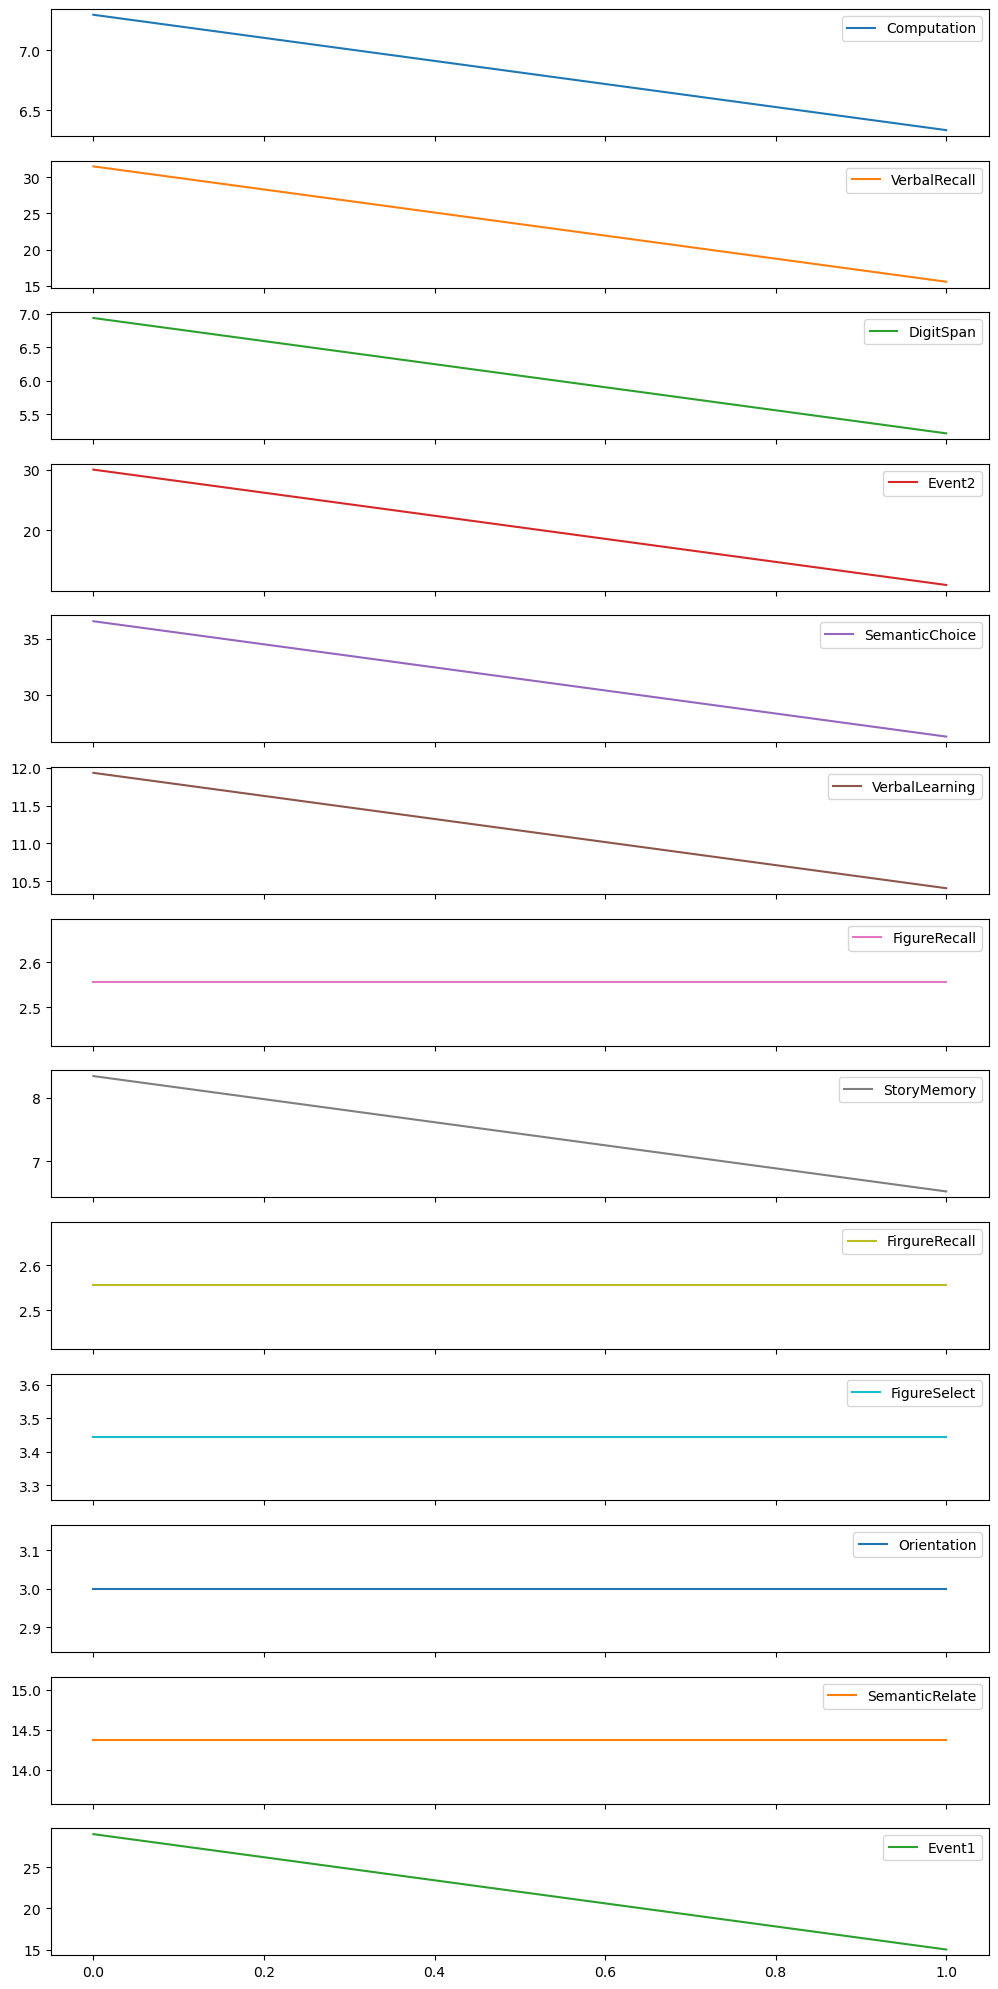

### Bar Chart


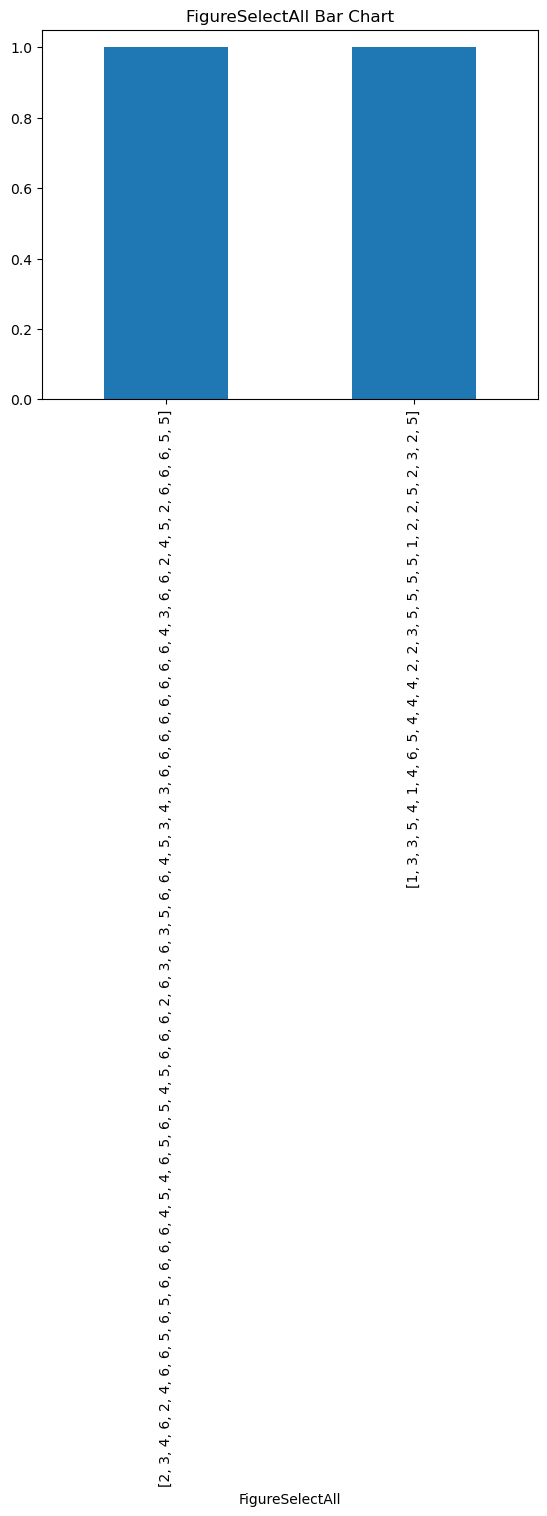

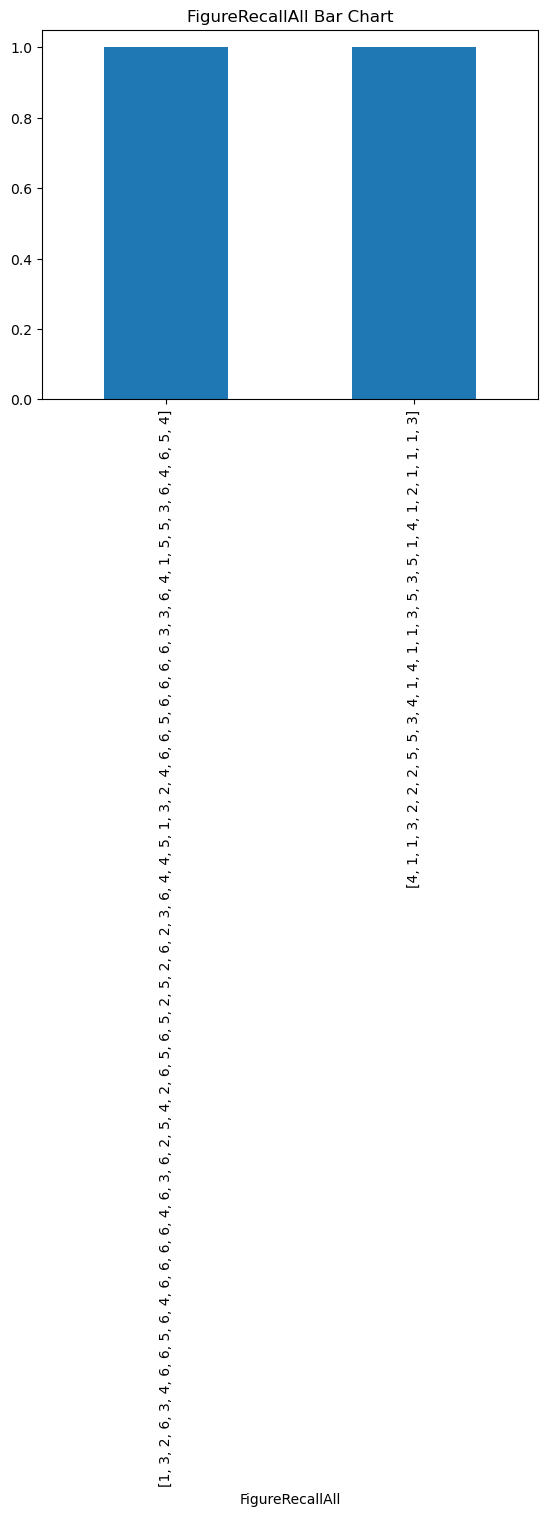

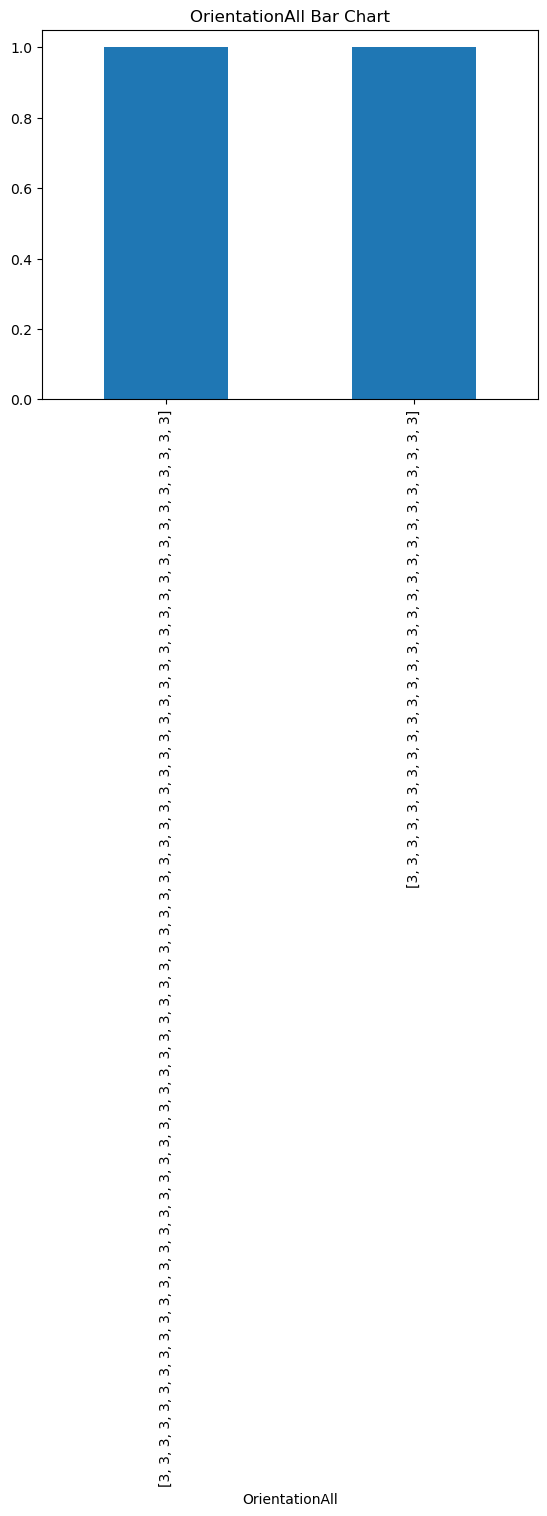

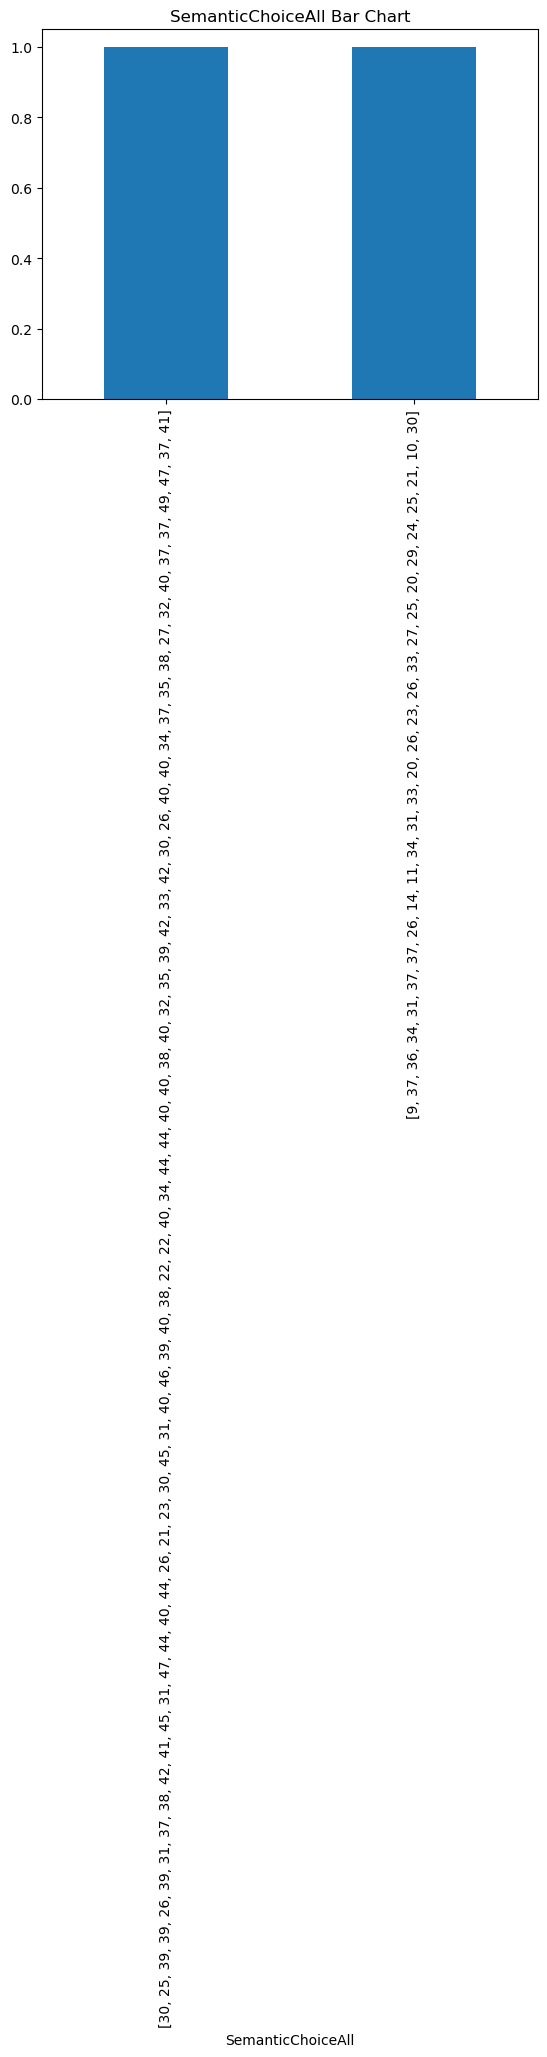

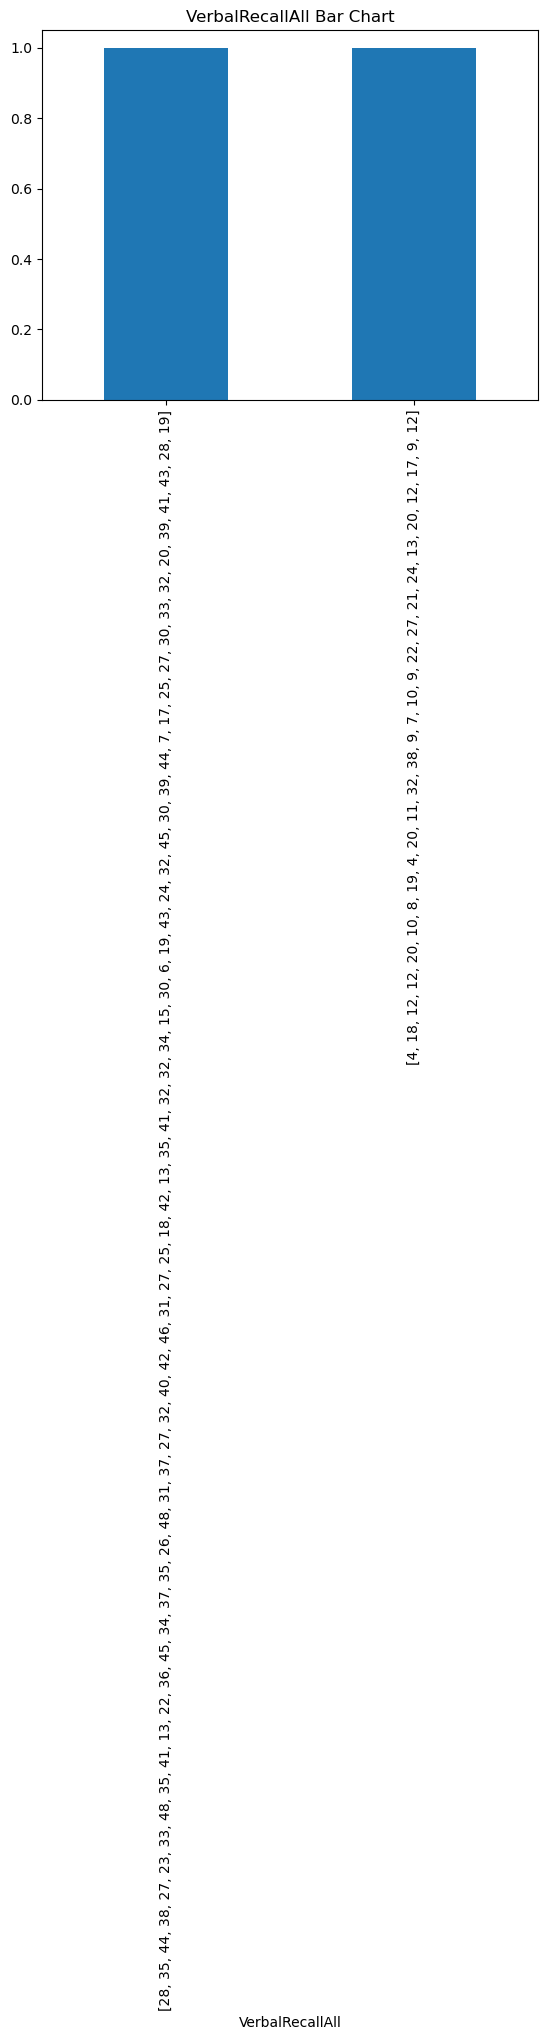

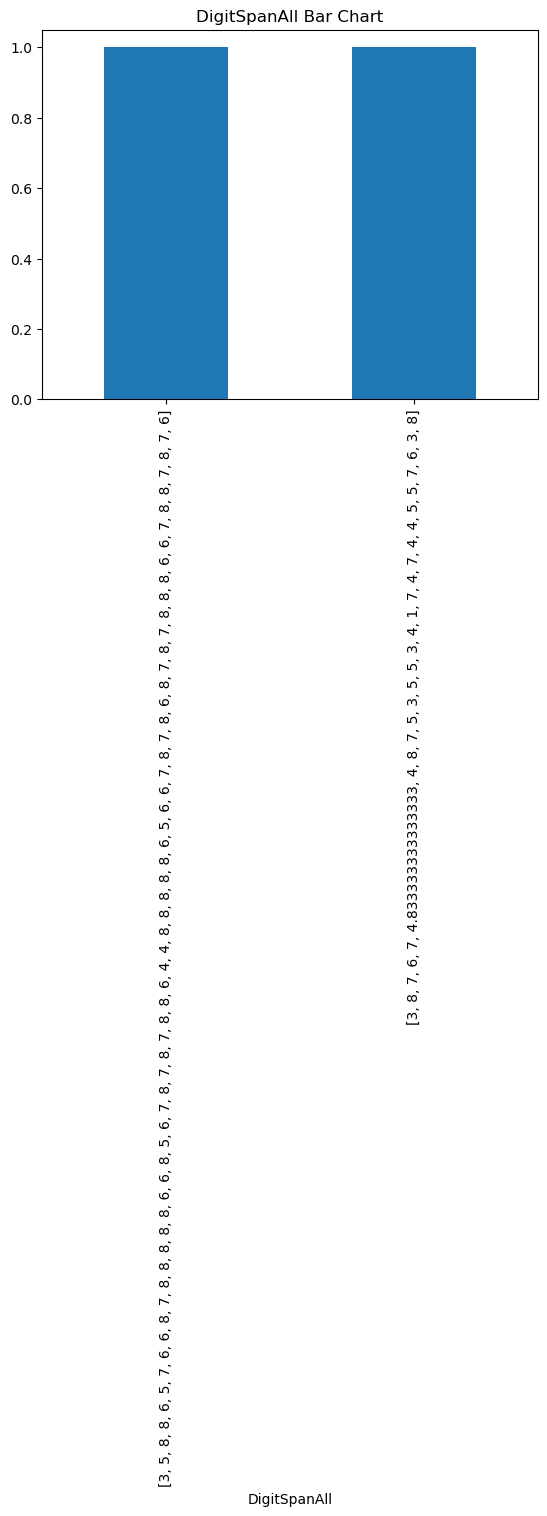

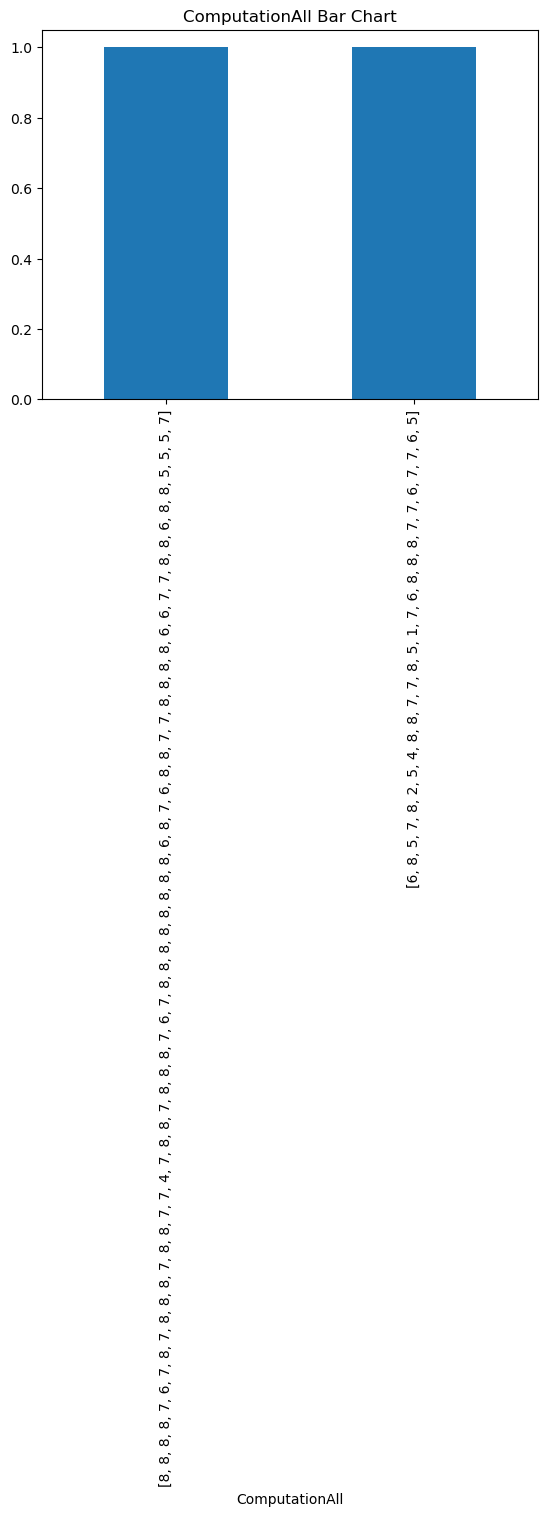

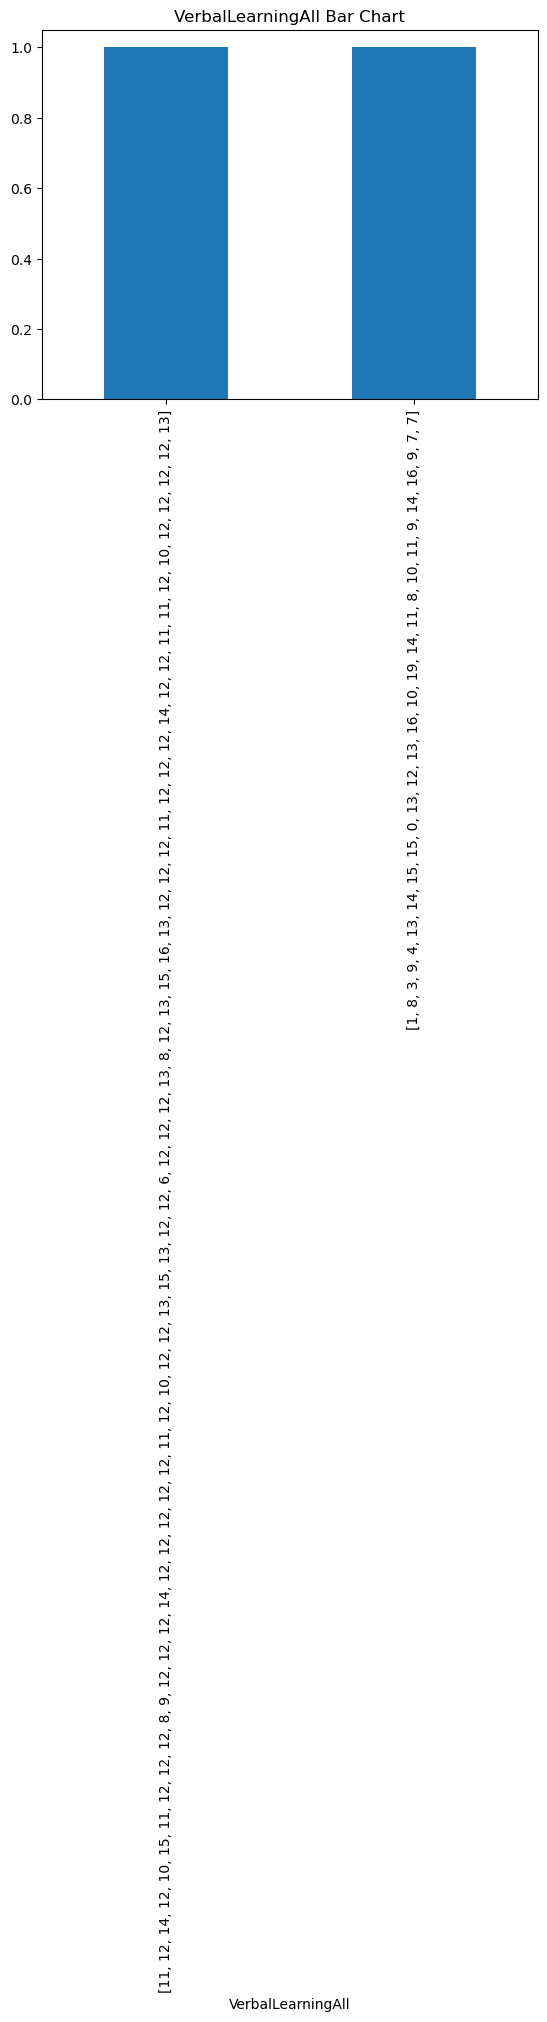

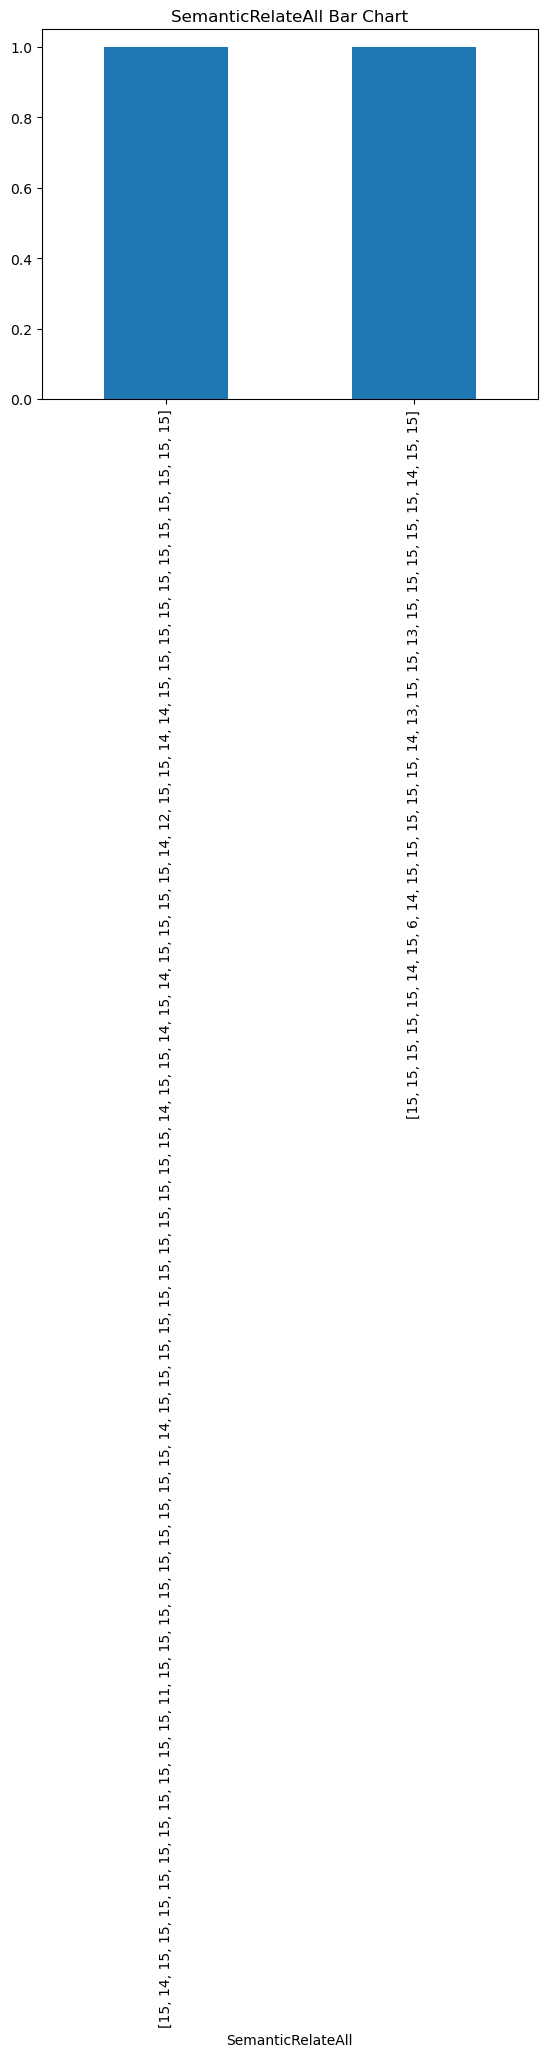

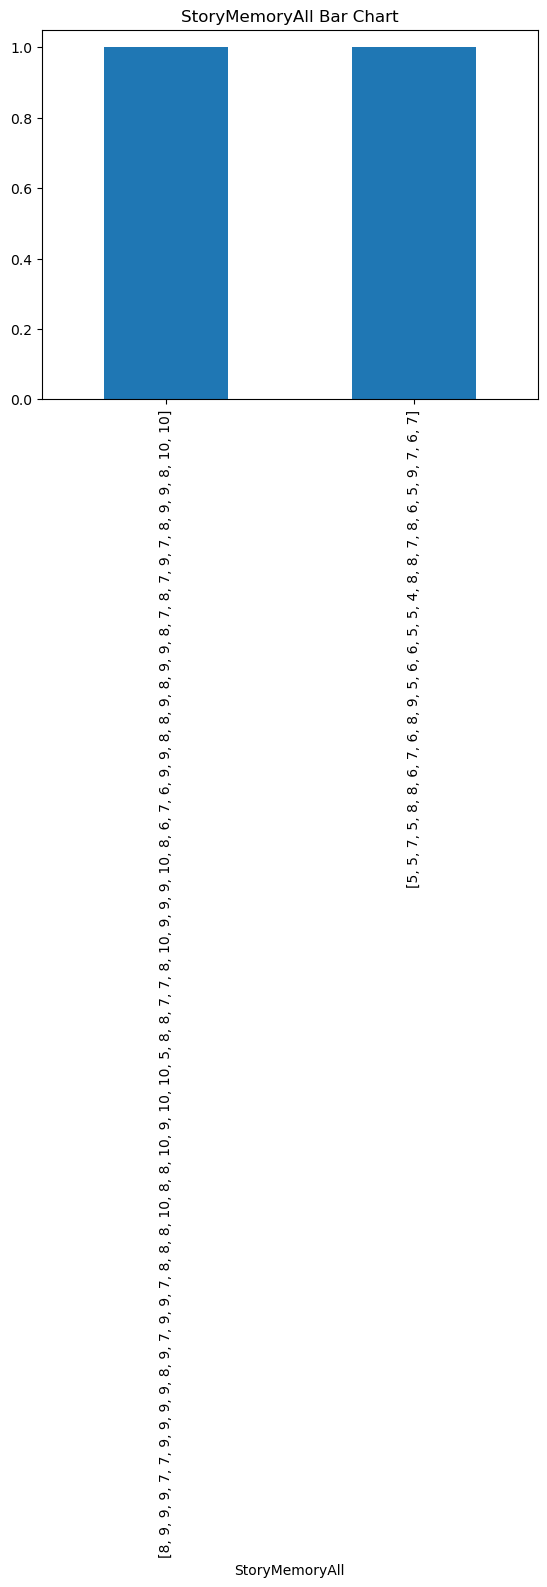

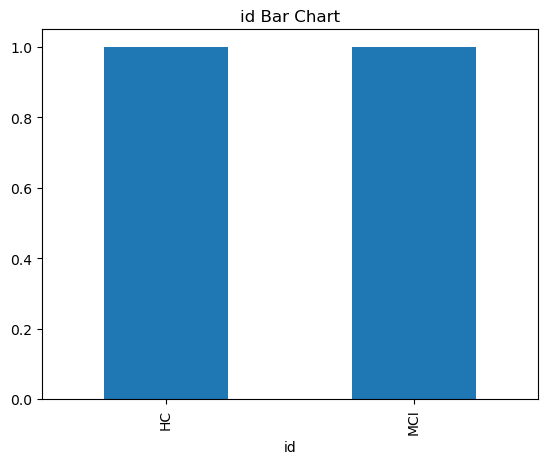

### Correlation Matrix


ValueError: could not convert string to float: '[2, 3, 4, 6, 2, 4, 6, 6, 5, 6, 5, 6, 6, 6, 6, 4, 5, 4, 6, 5, 6, 5, 4, 5, 6, 6, 6, 2, 6, 3, 6, 3, 5, 6, 6, 4, 5, 3, 4, 3, 6, 6, 6, 6, 6, 6, 6, 6, 4, 3, 6, 6, 2, 4, 5, 2, 6, 6, 6, 5, 5]'

In [13]:
# import streamlit as st
# import pandas as pd

# # Load the data
# df = pd.read_csv('firestore_data.csv')

# # Streamlit app
# st.title('Firestore Data Visualization')

# # Display the dataframe
# st.write("### Data Overview")
# st.write(df)

# # Display summary statistics
# st.write("### Summary Statistics")
# st.write(df.describe())

# # Display a line chart (for numerical data)
# st.write("### Line Chart")
# st.line_chart(df.select_dtypes(include=['float64', 'int64']))

# # Display a bar chart (for categorical data)
# st.write("### Bar Chart")
# for column in df.select_dtypes(include=['object']).columns:
#     st.write(f"#### {column}")
#     st.bar_chart(df[column].value_counts())

# # Display a correlation matrix
# st.write("### Correlation Matrix")
# st.write(df.corr())

# # Display more visualizations based on your data's structure and types

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('firestore_data.csv')

# Display the dataframe
print("### Data Overview")
display(df)

# Display summary statistics
print("### Summary Statistics")
display(df.describe())

# Display a line chart (for numerical data)
print("### Line Chart")
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.plot(kind='line', subplots=True, layout=(len(numerical_df.columns), 1), figsize=(10, 20))
plt.tight_layout()
plt.show()

# Display a bar chart (for categorical data)
print("### Bar Chart")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f"{column} Bar Chart")
    plt.show()

# Display a correlation matrix
print("### Correlation Matrix")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Display more visualizations based on your data's structure and types

# Display histograms for each numerical column
print("### Histograms")
for column in numerical_df.columns:
    plt.figure()
    df[column].plot(kind='hist', bins=30)
    plt.title(f"{column} Histogram")
    plt.show()

# Display box plots for numerical columns
print("### Box Plots")
for column in numerical_df.columns:
    plt.figure()
    sns.boxplot(data=df, x=column)
    plt.title(f"{column} Box Plot")
    plt.show()

# Display scatter plot matrix
print("### Scatter Plot Matrix")
pd.plotting.scatter_matrix(numerical_df, alpha=0.2, figsize=(10, 10))
plt.show()


In [10]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
